##Libraries

In [2]:
!pip install python-binance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.2 MB/s eta 0:00:00


In [3]:
from binance.client import Client
import numpy as np
import pandas as pd
from datetime import datetime

In [4]:
%tensorflow_version 2.x
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [5]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [6]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-6-5147f5580bb4>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch




##API section





In [7]:
api_key = 
api_secret = 

In [8]:
client = Client(api_key, api_secret,tld='us')
hist_time = '1 Jan, 2017'
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_15MINUTE, hist_time)

In [9]:
hist = pd.DataFrame(klines)

In [9]:
len(hist)

166011

In [10]:
hist.head(10)

,open,high,low,close,volume
date,,,,,
1569227400000,9930.13,9930.13,9930.13,9930.13,0.001
1569228300000,9930.13,9930.13,9930.13,9930.13,0.000
1569244500000,9930.13,9930.13,9930.13,9930.13,0.000
1569245400000,9930.13,9930.13,9930.13,9930.13,0.000
1569246300000,9930.13,9930.13,9930.13,9930.13,0.000
1569247200000,9930.13,9930.13,9930.13,9930.13,0.000
1569248100000,9930.13,9930.13,9930.13,9930.13,0.000
1569249000000,9930.13,9930.13,9930.13,9930.13,0.000
1569249900000,9930.13,9930.13,9930.13,9930.13,0.000


In [11]:
hist.to_csv("./Bitcoin_price.csv")



##Columns names




In [10]:
hist.columns = ['date', 'open', 'high', 'low', 'close', 'volume','Close time',\
                'Quote asset volume','Number of trades','Taker buy base asset volume',\
                'Taker buy quote asset volume','Ignore']
hist = hist.set_index('date')

## Drop useless columns

In [11]:
hist = hist.drop(['Close time','Quote asset volume','Number of trades','Taker buy base asset volume',\
                'Taker buy quote asset volume','Ignore'], axis=1)

## Changing format of data to numeric

In [12]:
hist[['open', 'high', 'low', 'close', 'volume']] = hist[['open', 'high', 'low', 'close', 'volume']].apply(pd.to_numeric)

## Data exploring

In [19]:
hist.reset_index(names = ['date'], inplace = True)

In [32]:
hist['date'].dtypes

dtype('int64')

In [39]:
hist['date'] = pd.to_datetime(hist['date'], unit='ms')

In [41]:
hist = hist.drop(columns = ['formatted_date'])

In [45]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165915 entries, 0 to 165914
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    165915 non-null  datetime64[ns]
 1   open    165915 non-null  float64       
 2   high    165915 non-null  float64       
 3   low     165915 non-null  float64       
 4   close   165915 non-null  float64       
 5   volume  165915 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 7.6 MB


In [63]:
hist.drop(columns=['date']).describe()

,open,high,low,close,volume
count,165915.000000,165915.000000,165915.000000,165915.000000,165915.000000
mean,30655.717619,30719.018320,30589.758990,30655.476264,6.644640
std,17784.131022,17825.134435,17742.418332,17783.899838,16.939269
min,3911.140000,4219.050000,3649.040000,3906.680000,0.000000
25%,16574.535000,16590.730000,16556.465000,16572.805000,0.389910
50%,28082.530000,28132.450000,28027.720000,28081.400000,1.544484
75%,43045.705000,43117.160000,42966.330000,43042.625000,5.628058
max,73558.170000,138070.000000,73423.070000,73518.590000,1035.045328


In [84]:
hist_stats = hist.copy()

In [85]:
hist_stats['year']= hist['date'].dt.year

In [87]:
hist_stats['month']= hist['date'].dt.month

In [88]:
hist_stats['weekday']= hist['date'].dt.day

In [92]:
hist_stats['weekday_name'] = hist_stats['date'].dt.strftime('%A')

In [55]:
hist_stats = hist_stats.drop(columns = 'date')

In [56]:
unique_years = hist_stats['year'].unique()

## Descriptive statistics for each year

In [64]:
for year in unique_years:
    df_year = hist_stats[hist_stats['year'] == year]
    stats = pd.DataFrame(df_year.drop(columns=['year']).describe())
    print(f"Rok: {year}", '\n',stats,'\n')


Rok: 2019 
               open          high          low         close       volume
count   9549.00000   9549.000000  9549.000000   9549.000000  9549.000000
mean    8013.91294   8025.184050  8002.385623   8013.743039     1.038877
std      762.87489    764.689918   760.909179    762.704709     2.399729
min     6468.86000   6521.790000  6438.080000   6456.360000     0.000000
25%     7307.01000   7316.050000  7298.990000   7306.760000     0.089637
50%     8042.80000   8051.240000  8026.940000   8042.330000     0.310436
75%     8497.05000   8508.540000  8489.410000   8498.270000     0.956844
max    10318.15000  10352.430000  9930.130000  10282.670000    57.308461 

Rok: 2020 
                open          high           low         close        volume
count  35035.000000  35035.000000  35035.000000  35035.000000  35035.000000
mean   11075.907342  11095.099708  11055.364825  11076.200728      1.821690
std     4250.221862   4264.186440   4235.525082   4251.047389      5.379529
min     3911.

In [133]:
hist_stats['year'].value_counts()

year
2022    35039
2020    35035
2023    35012
2021    34995
2024    16285
2019     9549
Name: count, dtype: int64

## **VISUALIZATION**

<Figure size 1000x600 with 0 Axes>

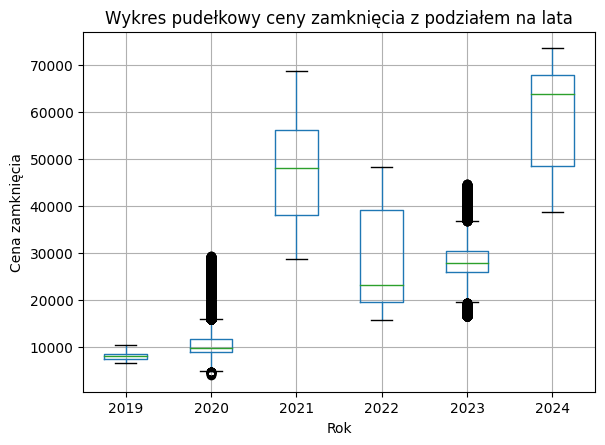

In [66]:
plt.figure(figsize=(10, 6))
hist_stats.boxplot(column='close', by='year')
plt.title('Wykres pudełkowy ceny zamknięcia z podziałem na lata')
plt.suptitle('')  # Usunięcie domyślnego tytułu wygenerowanego przez pandas
plt.xlabel('Rok')
plt.ylabel('Cena zamknięcia')
plt.show()

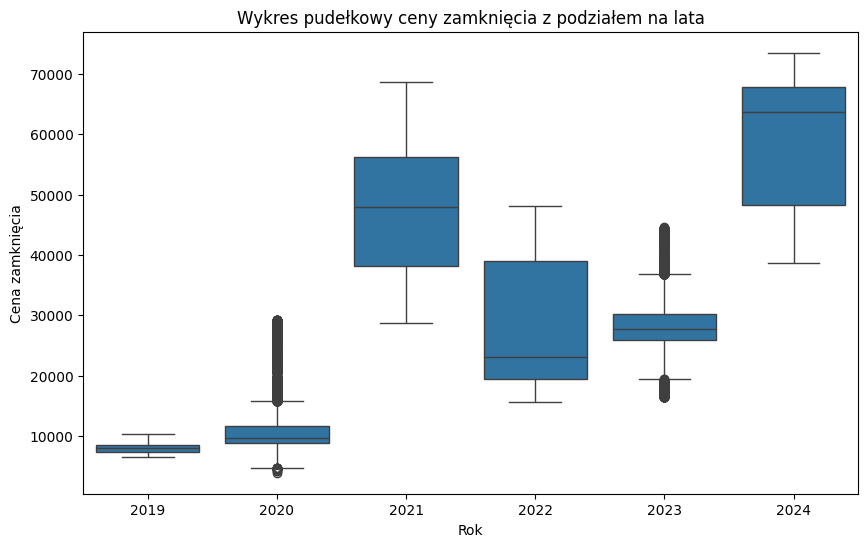

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='close', data=hist_stats)
plt.title('Wykres pudełkowy ceny zamknięcia z podziałem na lata')
plt.xlabel('Rok')
plt.ylabel('Cena zamknięcia')
plt.show()

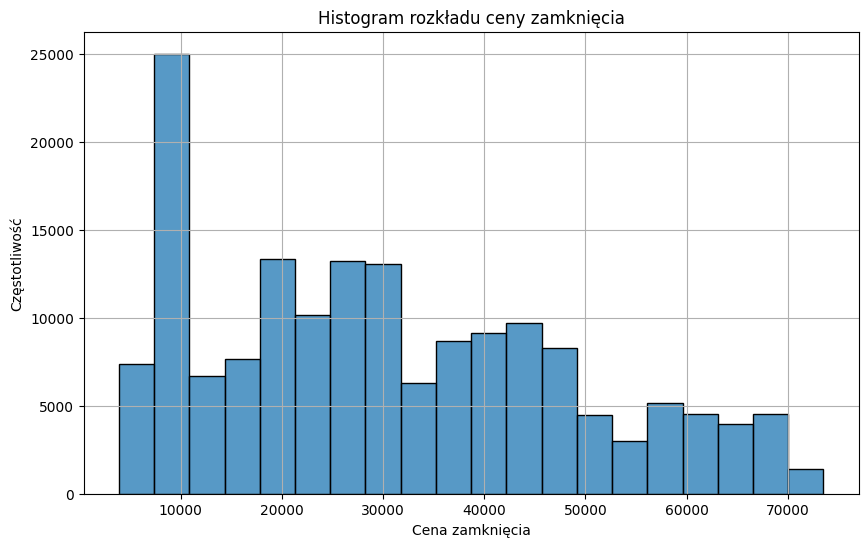

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(hist_stats['close'], bins=20, kde=False)
plt.title('Histogram rozkładu ceny zamknięcia')
plt.xlabel('Cena zamknięcia')
plt.ylabel('Częstotliwość')
plt.grid(True)
plt.show()

In [69]:
max(hist_stats['high'])

138070.0

In [135]:
hist_stats.nlargest(5, 'high')

,date,open,high,low,close,volume,year,month,weekday,weekday_name,daily_change
131011,2023-06-21 01:15:00,28804.98,138070.00,28700.00,28874.90,74.73664,2023,6,21,Wednesday,65.21
156666,2024-03-14 07:00:00,73485.35,73779.26,73423.07,73489.09,1.61339,2024,3,14,Thursday,1.34
156664,2024-03-14 06:30:00,73558.17,73560.75,73260.57,73465.42,0.92204,2024,3,14,Thursday,-53.17
156665,2024-03-14 06:45:00,73465.00,73560.50,73273.52,73487.75,1.06751,2024,3,14,Thursday,22.33
156579,2024-03-13 09:15:00,73500.00,73559.04,73262.82,73398.83,1.23479,2024,3,13,Wednesday,-6.80


In [96]:
max_high_index = hist['high'].idxmax()

In [97]:
hist = hist.drop(max_high_index)

In [98]:
hist.reset_index(inplace = True, drop = True)

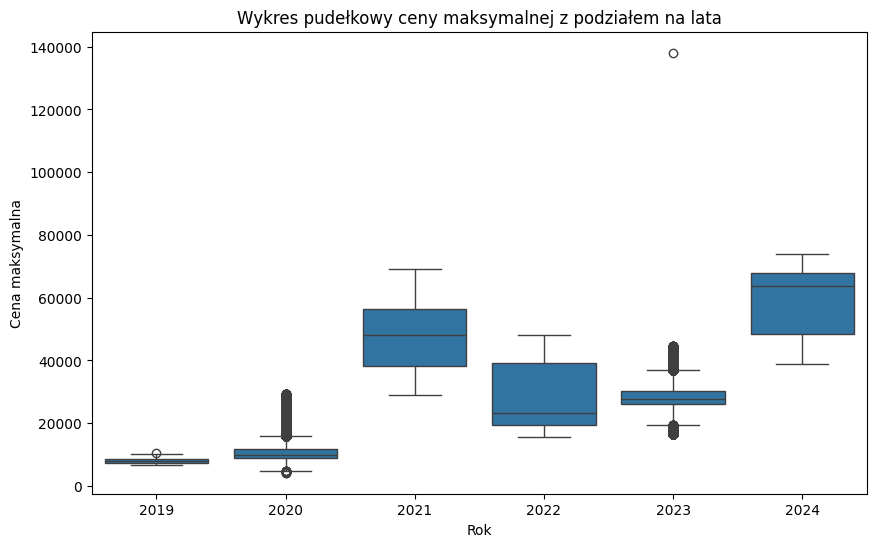

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='high', data=hist_stats)
plt.title('Wykres pudełkowy ceny maksymalnej z podziałem na lata')
plt.xlabel('Rok')
plt.ylabel('Cena maksymalna')
plt.show()

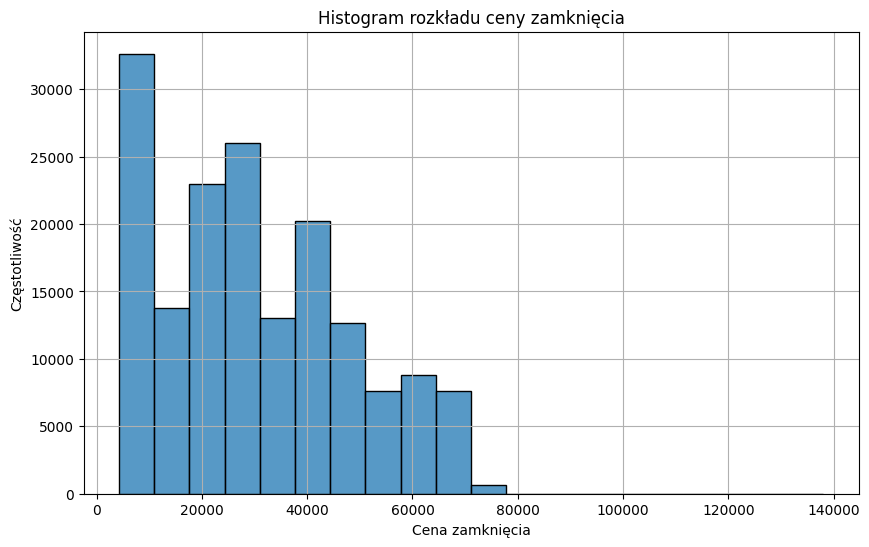

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(hist_stats['high'], bins=20, kde=False)
plt.title('Histogram rozkładu ceny maksymalnej')
plt.xlabel('Cena zamknięcia')
plt.ylabel('Częstotliwość')
plt.grid(True)
plt.show()

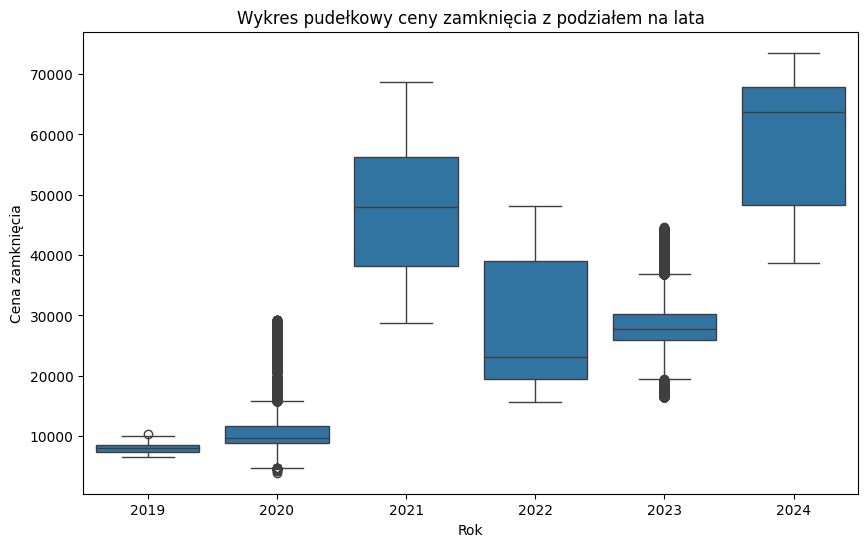

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='open', data=hist_stats)
plt.title('Wykres pudełkowy ceny otwarcia z podziałem na lata')
plt.xlabel('Rok')
plt.ylabel('Cena otwarcia')
plt.show()

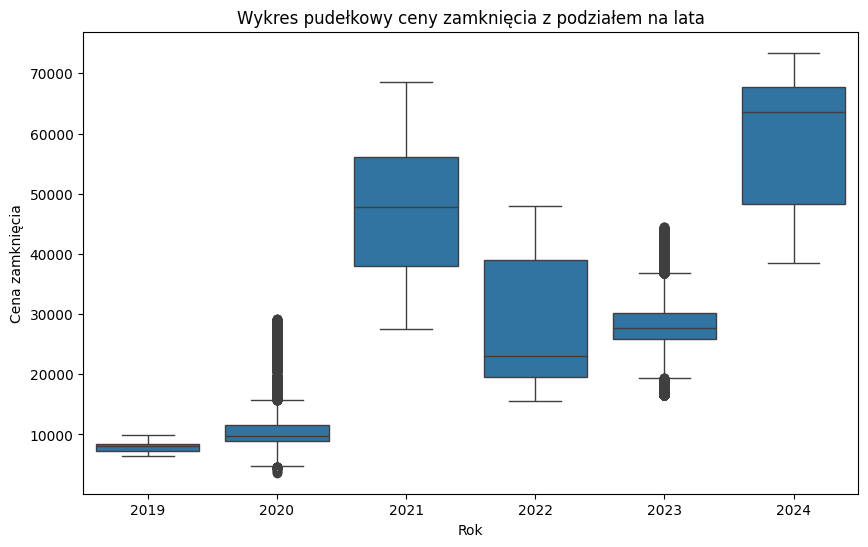

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='low', data=hist_stats)
plt.title('Wykres pudełkowy ceny minimalna z podziałem na lata')
plt.xlabel('Rok')
plt.ylabel('Cena minimalna')
plt.show()

In [102]:
hist_stats.nlargest(5, 'volume')

,date,open,high,low,close,volume,year,month,weekday,weekday_name
109507,2022-11-08 18:15:00,19020.01,19055.25,18534.97,18760.68,1035.045328,2022,11,8,Tuesday
104898,2022-09-21 18:00:00,19584.13,19799.34,18795.14,18889.36,739.430052,2022,9,21,Wednesday
108932,2022-11-02 18:30:00,20737.90,20802.88,20414.56,20608.01,635.164373,2022,11,2,Wednesday
109506,2022-11-08 18:00:00,19343.11,19538.44,18850.38,19026.52,578.185813,2022,11,8,Tuesday
108158,2022-10-25 17:00:00,19809.50,20191.71,19807.69,20095.85,542.424516,2022,10,25,Tuesday


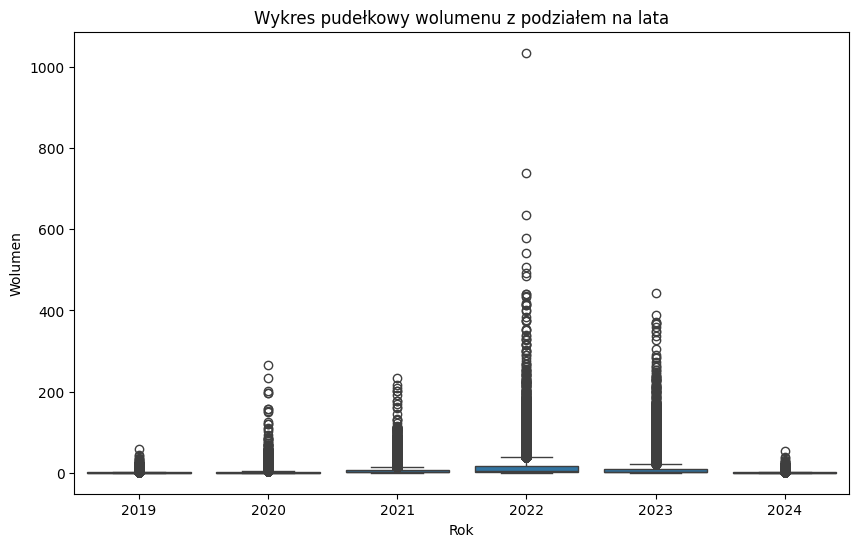

In [136]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='volume', data=hist_stats)
plt.title('Wykres pudełkowy wolumenu z podziałem na lata')
plt.xlabel('Rok')
plt.ylabel('Wolumen')
plt.show()

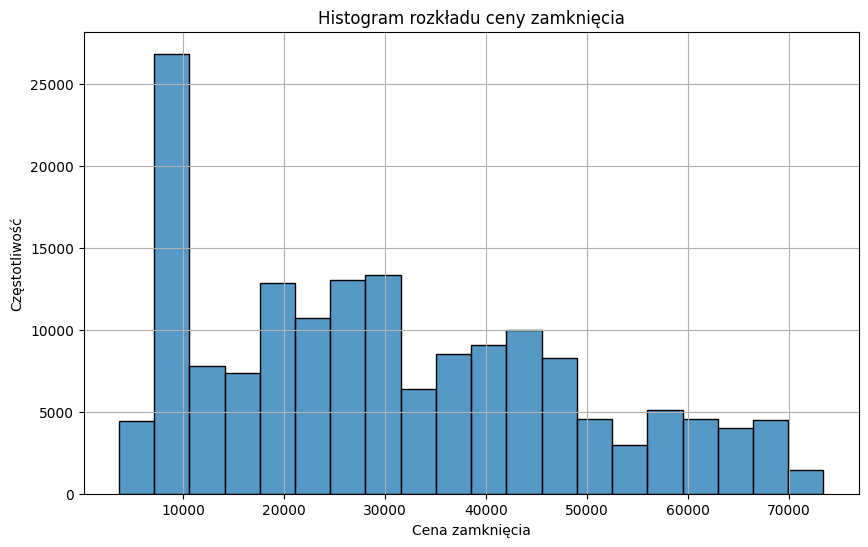

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(hist_stats['low'], bins=20, kde=False)
plt.title('Histogram rozkładu ceny minimalnej')
plt.xlabel('Cena minimalna')
plt.ylabel('Częstotliwość')
plt.grid(True)
plt.show()

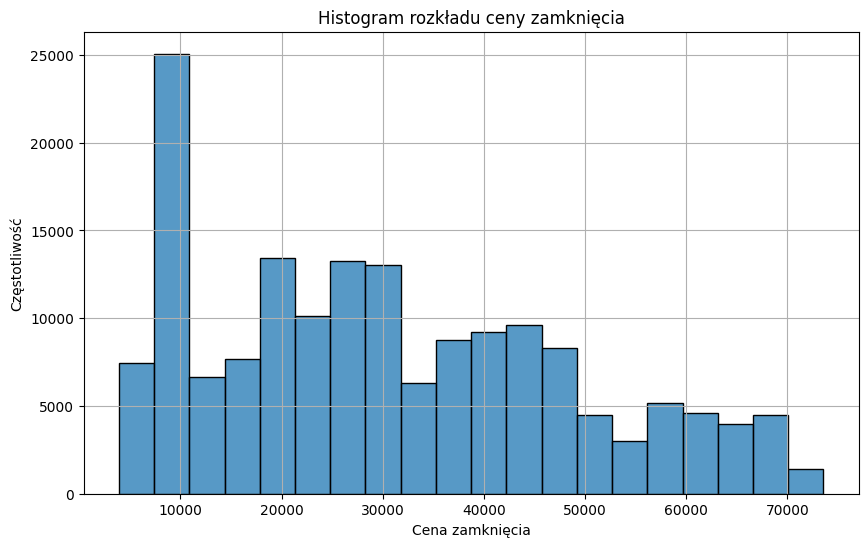

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(hist_stats['open'], bins=20, kde=False)
plt.title('Histogram rozkładu ceny otwarcia')
plt.xlabel('Cena otwarcia')
plt.ylabel('Częstotliwość')
plt.grid(True)
plt.show()

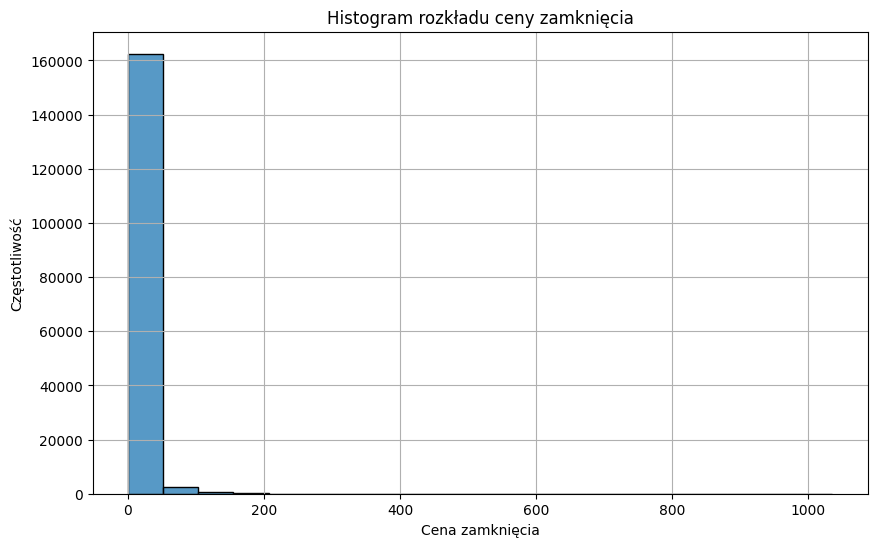

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(hist_stats['volume'], bins=20, kde=False)
plt.title('Histogram rozkładu wolumenu')
plt.xlabel('Wolumen')
plt.ylabel('Częstotliwość')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Cena zamknięcia')

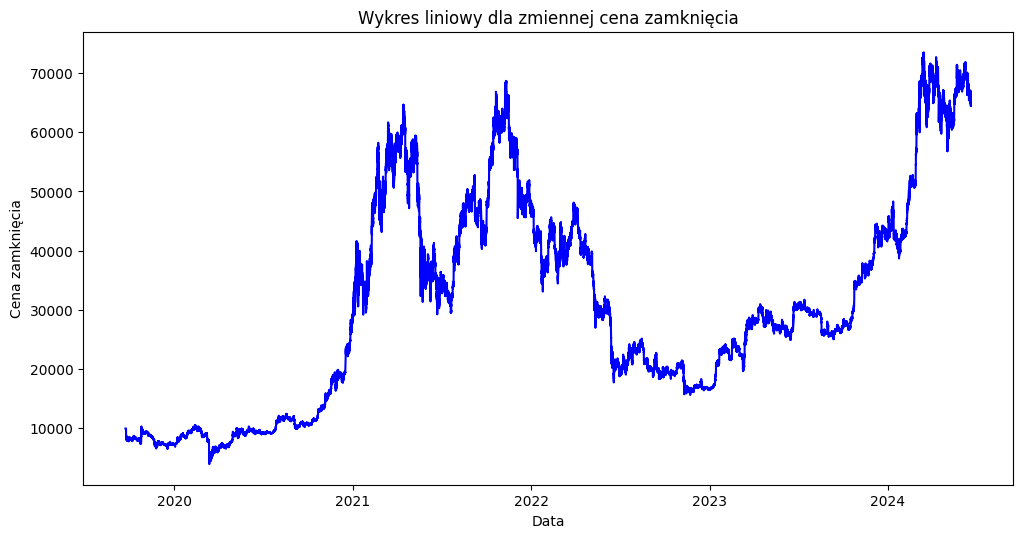

In [82]:
plt.figure(figsize=(12, 20))
plt.subplot(3, 1, 1)
plt.plot(hist['date'], hist['close'], color='blue', linestyle='-')
plt.title('Wykres liniowy dla zmiennej cena zamknięcia')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')

Text(0, 0.5, 'Cena zamknięcia')

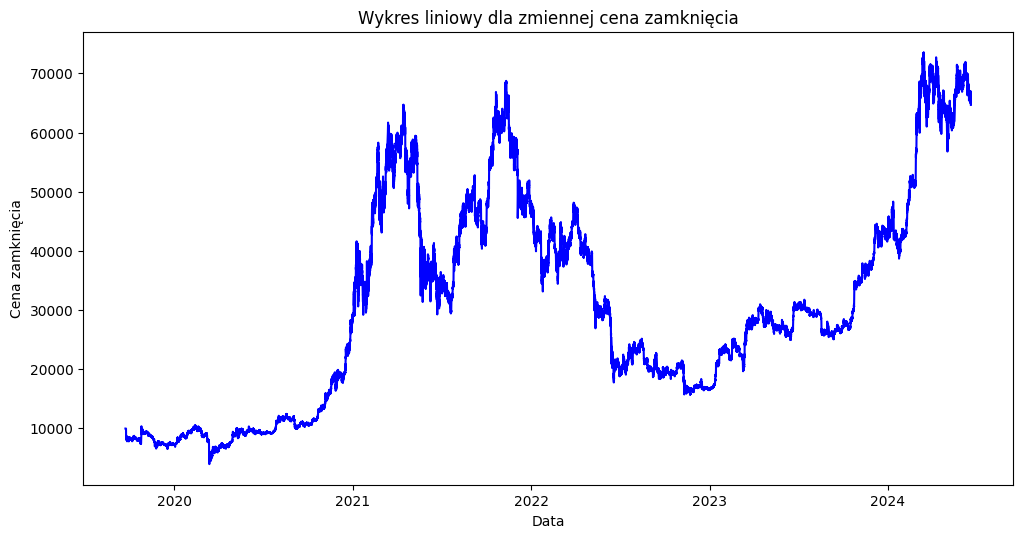

In [83]:
plt.figure(figsize=(12, 20))
plt.subplot(3, 1, 1)
plt.plot(hist['date'], hist['open'], color='blue', linestyle='-')
plt.title('Wykres liniowy dla zmiennej cena otwarcia')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')

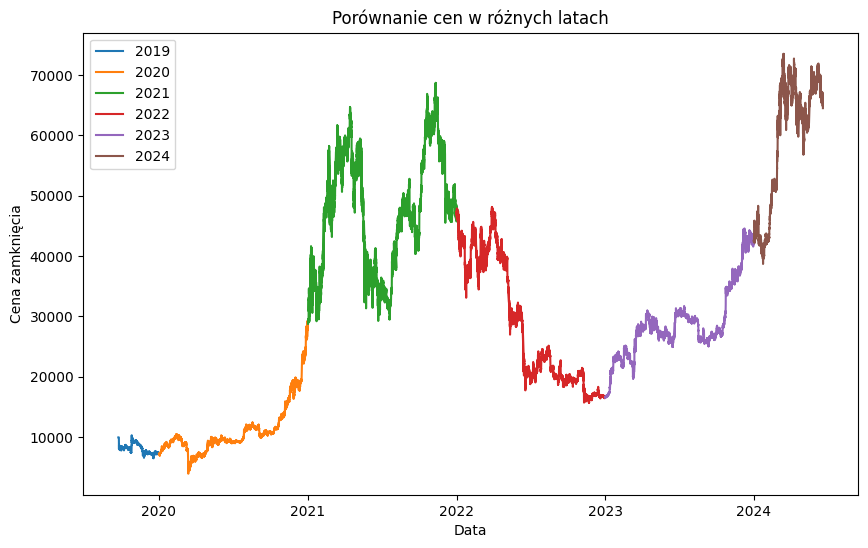

In [86]:
plt.figure(figsize=(10, 6))
for year in hist_stats['year'].unique():
    df_year = hist_stats[hist_stats['year'] == year]
    plt.plot(df_year['date'], df_year['close'], label=str(year))
plt.title('Porównanie cen w różnych latach')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.legend()
plt.show()

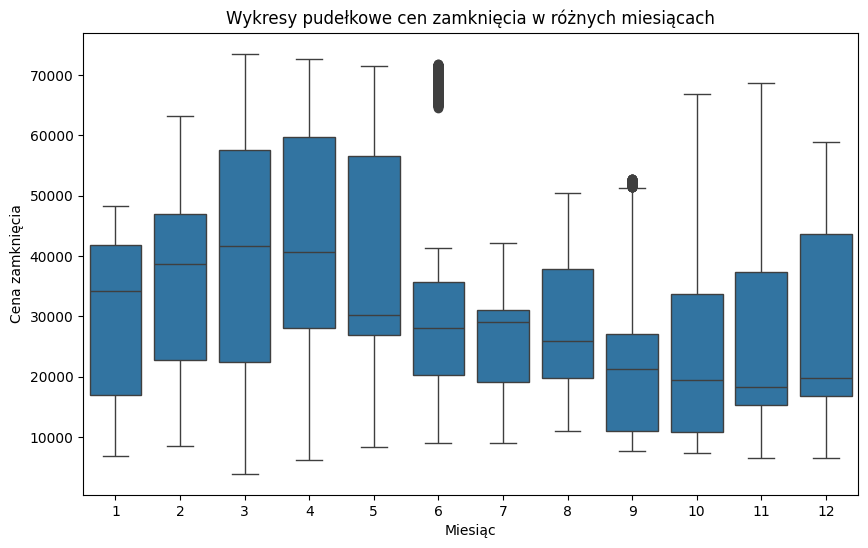

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='close', data=hist_stats)
plt.title('Wykresy pudełkowe cen zamknięcia w różnych miesiącach')
plt.xlabel('Miesiąc')
plt.ylabel('Cena zamknięcia')
plt.show()

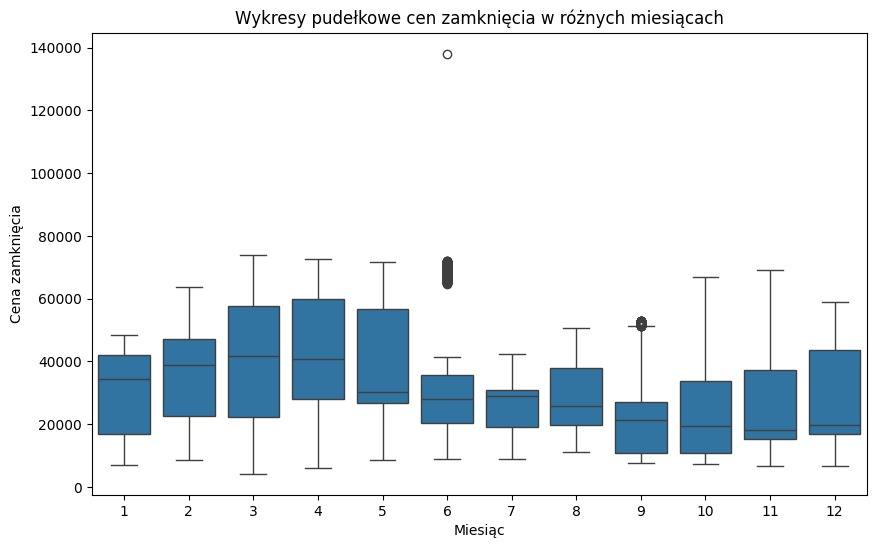

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='high', data=hist_stats)
plt.title('Wykresy pudełkowe cen maksymalnych w różnych miesiącach')
plt.xlabel('Miesiąc')
plt.ylabel('Cena zamknięcia')
plt.show()

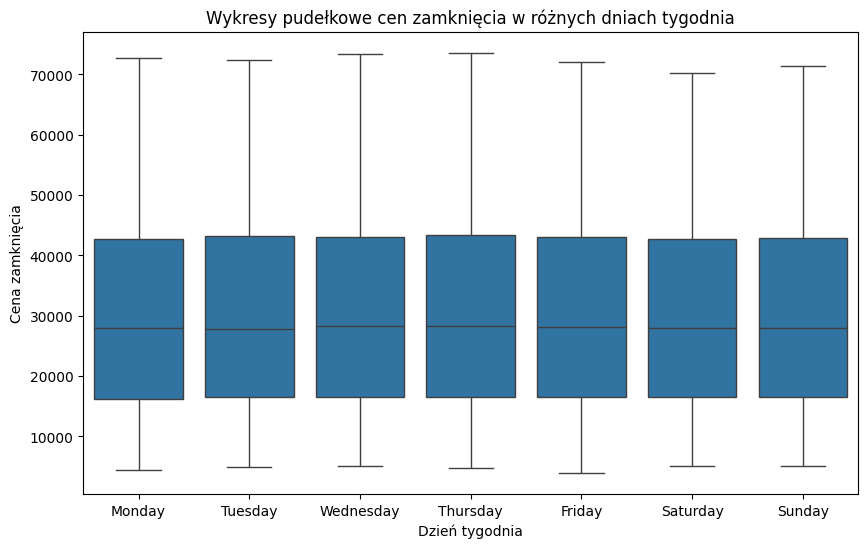

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday_name', y='close', data=hist_stats)
plt.title('Wykresy pudełkowe cen zamknięcia w różnych dniach tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Cena zamknięcia')
plt.show()

In [103]:
hist_corr = hist.copy()

In [104]:
hist_corr = hist_corr.drop(columns = ['date'])

In [107]:
correlation_matrix = hist_corr.corr()
correlation_matrix

,open,high,low,close,volume
open,1.000000,0.999984,0.999981,0.999975,-0.091607
high,0.999984,1.000000,0.999967,0.999985,-0.090528
low,0.999981,0.999967,1.000000,0.999984,-0.092939
close,0.999975,0.999985,0.999984,1.000000,-0.091727
volume,-0.091607,-0.090528,-0.092939,-0.091727,1.000000


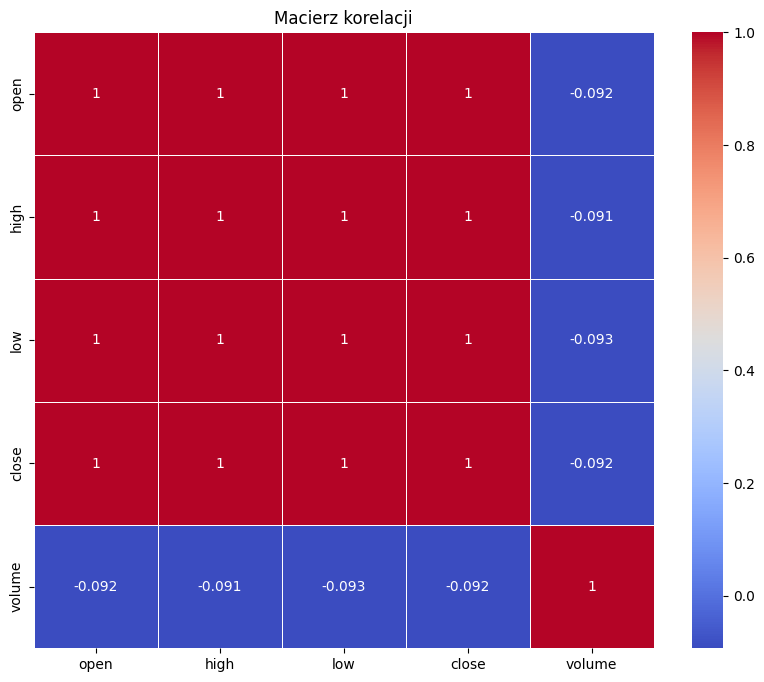

In [108]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Macierz korelacji')
plt.show()

In [109]:
hist_stats['daily_change'] = hist_stats['close'].diff()

In [131]:
daily_average_volume = hist_stats.groupby(hist_stats['date'].dt.date)['volume'].mean()

In [116]:
hist_stats.nlargest(10, 'daily_change')

,date,open,high,low,close,volume,year,month,weekday,weekday_name,daily_change
57872,2021-05-19 13:30:00,33596.92,37453.48,33524.80,37387.55,71.078134,2021,5,19,Wednesday,3808.20
155854,2024-03-05 20:00:00,59957.30,63005.19,59775.43,62994.02,17.628510,2024,3,5,Tuesday,2994.02
47293,2021-01-29 08:45:00,33323.07,36500.00,33323.07,36265.84,82.554520,2021,1,29,Friday,2945.87
48269,2021-02-08 12:45:00,40314.96,43253.02,40314.96,43005.82,37.573381,2021,2,8,Monday,2690.86
57877,2021-05-19 14:45:00,35283.23,37580.04,35283.22,37470.40,69.133622,2021,5,19,Wednesday,2167.95
45587,2021-01-11 14:15:00,30984.31,33414.62,30876.51,33089.93,46.365069,2021,1,11,Monday,2089.93
57884,2021-05-19 16:30:00,37464.56,39583.27,37406.10,39504.70,51.954872,2021,5,19,Wednesday,2085.96
71279,2021-10-06 13:00:00,52754.87,55610.71,52635.89,54666.80,91.357760,2021,10,6,Wednesday,1931.94
86690,2022-03-16 02:00:00,39534.99,41505.80,39515.10,41400.00,36.943006,2022,3,16,Wednesday,1913.29
58005,2021-05-20 22:45:00,39644.02,41779.66,39644.02,41507.79,52.780856,2021,5,20,Thursday,1869.33


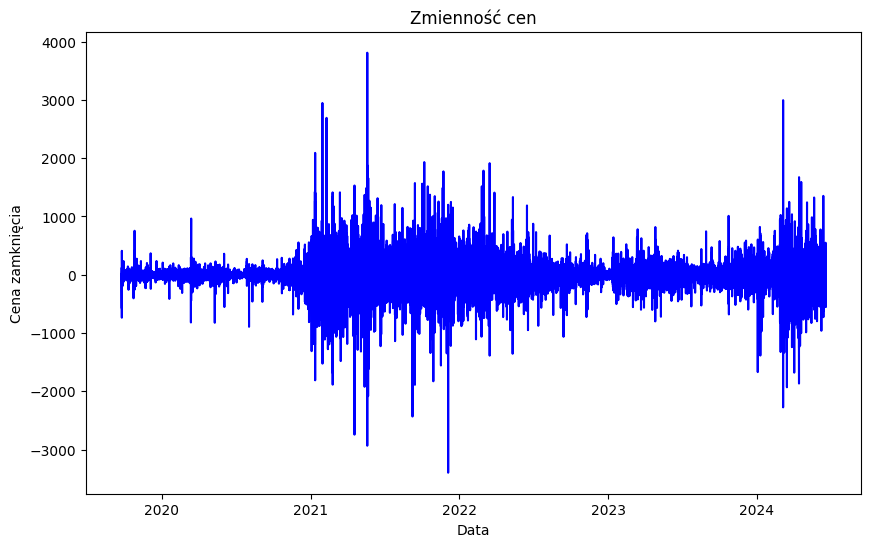

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(hist_stats['date'],hist_stats['daily_change'], color='blue', linestyle='-')
plt.title('Zmienność cen')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.show()

In [121]:
daily_average_volume = pd.DataFrame()

In [ ]:
daily_average_volume = daily_average_volume[::30]

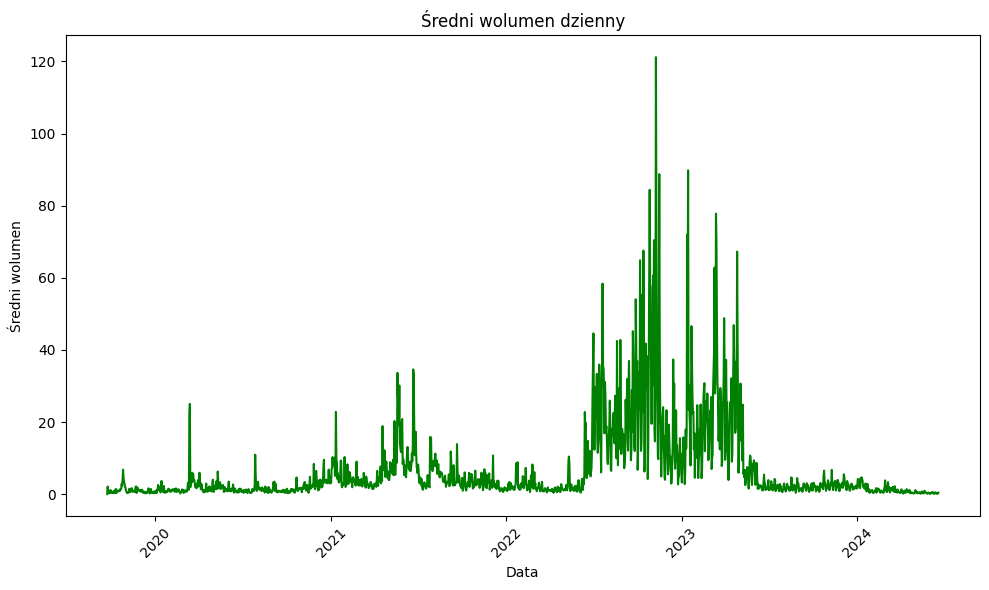

In [132]:

plt.figure(figsize=(10, 6))
daily_average_volume.plot(kind='line', color='green')
plt.title('Średni wolumen dzienny')
plt.xlabel('Data')
plt.ylabel('Średni wolumen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **MODEL LSTM**

In [13]:
target_col = 'close'

In [14]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [15]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    # scaler = MinMaxScaler(feature_range = (0,1))
    # scaled_data = scaler.fit_transform(df)
    return (df - df.min()) / (df.max() - df.min())
    # return scaled_data

In [15]:
def quantile_normalize(df):
    """
    input: dataframe with numerical columns
    output: dataframe with quantile normalized values
    """
    df_sorted = pd.DataFrame(np.sort(df.values,
                                     axis=0),
                             index=df.index,
                             columns=df.columns)
    df_mean = df_sorted.mean(axis=1)
    df_mean.index = np.arange(1, len(df_mean) + 1)
    df_qn =df.rank(method="min").stack().astype(int).map(df_mean).unstack()
    return(df_qn)

In [16]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = quantile_normalize(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [17]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    # X_train = extract_window_data(train_data, window_len, zero_base)
    # X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [35]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons,return_sequences=True, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(LSTM(units=16,return_sequences=True, dropout=dropout))
    # model.add(LSTM(units=8, dropout=dropout))
    model.add(Dense(units = 8))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [9]:
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.05, max_value=0.15, step=0.05)))
    model.add(LSTM(units=hp.Choice('lstm_units', values=[32, 64, 128]),return_sequences=True, dropout=hp.Float('dropout', min_value=0.05, max_value=0.15, step=0.05)))
    model.add(LSTM(units=8, dropout=hp.Float('dropout', min_value=0.05, max_value=0.15, step=0.05)))
    model.add(Dense(units=1))
    model.add(Activation('linear'))

    model.compile(loss='mse', optimizer='adam')
    return model

In [29]:
np.random.seed(42)
window_len = 60
test_size = 0.2
zero_base = True
lstm_neurons = 32
epochs = 20
batch_size = 128
loss = 'mse'
dropout = 0.1
optimizer = 'adam'

In [20]:
train, test, X_train, X_test, Y_train, Y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [36]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
1038/1038 [==============================] - 16s 12ms/step - loss: 0.0023 - val_loss: 3.4991e-04
Epoch 2/20
1038/1038 [==============================] - 12s 11ms/step - loss: 8.3247e-04 - val_loss: 3.4827e-04
Epoch 3/20
1038/1038 [==============================] - 12s 11ms/step - loss: 8.2833e-04 - val_loss: 3.4816e-04
Epoch 4/20
1038/1038 [==============================] - 11s 11ms/step - loss: 8.2750e-04 - val_loss: 3.4840e-04
Epoch 5/20
1038/1038 [==============================] - 11s 11ms/step - loss: 8.3172e-04 - val_loss: 3.6447e-04
Epoch 6/20
1038/1038 [==============================] - 11s 11ms/step - loss: 8.2932e-04 - val_loss: 4.2521e-04
Epoch 7/20
1038/1038 [==============================] - 11s 11ms/step - loss: 8.2658e-04 - val_loss: 3.4904e-04
Epoch 8/20
1038/1038 [==============================] - 11s 11ms/step - loss: 8.2259e-04 - val_loss: 3.6594e-04
Epoch 9/20
1038/1038 [==============================] - 11s 11ms/step - loss: 8.2368e-04 - val_loss: 3.9941e

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


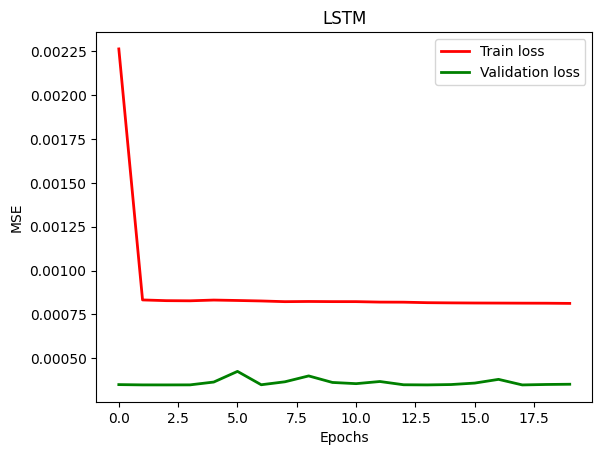

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', linewidth=2, label='Train loss')
plt.plot(history.history['val_loss'], 'g', linewidth=2, label='Validation loss')
plt.title('LSTM')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=15,  # liczba prób do przetestowania
    executions_per_trial=1,
    directory='/content/drive/MyDrive/LSTM_models',  # katalog do przechowywania wyników strojenia
    project_name='lstm')

# Przeszukiwanie przestrzeni hiperparametrów
tuner.search(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

# Wyświetlenie najlepszych hiperparametrów
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps)

# Zbudowanie modelu z najlepszymi hiperparametrami
# model = tuner.hypermodel.build(best_hps)
# model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Trial 4 Complete [01h 09m 34s]
val_loss: 0.0003481454332359135

Best val_loss So Far: 0.0003480773593764752
Total elapsed time: 04h 39m 27s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
128               |32                |units
0.1               |0.1               |dropout
64                |64                |lstm_units

Epoch 1/10
4151/4151 [==============================] - 765s 183ms/step - loss: 9.7884e-04 - val_loss: 3.7754e-04
Epoch 2/10
4151/4151 [==============================] - 775s 187ms/step - loss: 8.2485e-04 - val_loss: 3.5260e-04
Epoch 3/10
4151/4151 [==============================] - 778s 187ms/step - loss: 8.1308e-04 - val_loss: 3.4974e-04
Epoch 4/10
4151/4151 [==============================] - 751s 181ms/step - loss: 8.1250e-04 - val_loss: 3.4877e-04
Epoch 5/10
4151/4151 [==============================] - 781s 188ms/step - loss: 8.1238e-04 - val_loss: 3.5013e-04
Epoch 6/10
4151/4151 [==============================] - 782s 188ms/ste

In [10]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=15,  # liczba prób do przetestowania
    executions_per_trial=1,
    directory='/content/drive/MyDrive/LSTM_models',# katalog do przechowywania wyników strojenia
    overwrite = False ,
    project_name='lstm')

Reloading Tuner from /content/drive/MyDrive/LSTM_models/lstm/tuner0.json


In [14]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps.values)

Best hyperparameters: {'units': 32, 'dropout': 0.1, 'lstm_units': 64}
